## Sesion Pyspark

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

SpSession = SparkSession \
    .builder \
    .appName("Pyspark Turist Canary") \
    .getOrCreate()

SpSession.sparkContext.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/07/13 18:05:17 WARN Utils: Your hostname, yani-OMEN-by-HP-Laptop, resolves to a loopback address: 127.0.1.1; using 192.168.1.222 instead (on interface wlo1)
25/07/13 18:05:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/13 18:05:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [79]:
from pyspark.sql.functions import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Carga de Datos

In [3]:

df_pd_hotel = pd.read_csv("https://datos.canarias.es/api/estadisticas/statistical-resources/v1.0/datasets/ISTAC/C00065A_000048/1.15.csv")
df_sp_hotel = SpSession.createDataFrame(df_pd_hotel)


/tmp/ipykernel_4010/2883664287.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pd_hotel = pd.read_csv("https://datos.canarias.es/api/estadisticas/statistical-resources/v1.0/datasets/ISTAC/C00065A_000048/1.15.csv")


In [4]:
df_sp_hotel.show(5, truncate=False)

+-----------------------------------------+--------------------------------------+--------------+----------------+---------------+-----------------+-------------+---------------+--------------+--------------+---------+---------------------+-----------------------+-------------------------------+---------------------------------+--------------------+
|EVENTO#es                                |EVENTO_CODE                           |TIME_PERIOD#es|TIME_PERIOD_CODE|NACIONALIDAD#es|NACIONALIDAD_CODE|TERRITORIO#es|TERRITORIO_CODE|MEDIDAS#es    |MEDIDAS_CODE  |OBS_VALUE|ESTADO_OBSERVACION#es|ESTADO_OBSERVACION_CODE|CONFIDENCIALIDAD_OBSERVACION#es|CONFIDENCIALIDAD_OBSERVACION_CODE|NOTAS_OBSERVACION#es|
+-----------------------------------------+--------------------------------------+--------------+----------------+---------------+-----------------+-------------+---------------+--------------+--------------+---------+---------------------+-----------------------+-------------------------------+

In [5]:

df_pd_type = pd.read_csv("https://datos.canarias.es/api/estadisticas/statistical-resources/v1.0/datasets/ISTAC/E16028B_000013/1.47.csv")
df_sp_type = SpSession.createDataFrame(df_pd_type)

In [6]:
df_sp_type.show(5, truncate=False)

+---------------------------------+------------+--------------+----------------+-------------+---------------+--------------------------+---------------------+--------------------------------+-------------------------------+---------------+-----------------+---------+-------------------------------+-----------------+---------------------+-----------------------+
|MEDIDAS#es                       |MEDIDAS_CODE|TIME_PERIOD#es|TIME_PERIOD_CODE|TERRITORIO#es|TERRITORIO_CODE|LUGAR_RESIDENCIA#es       |LUGAR_RESIDENCIA_CODE|ALOJAMIENTO_TURISTICO_TIPO#es   |ALOJAMIENTO_TURISTICO_TIPO_CODE|TIPO_VIAJERO#es|TIPO_VIAJERO_CODE|OBS_VALUE|CONFIDENCIALIDAD_OBSERVACION#es|NOTAS_OBSERVACION|ESTADO_OBSERVACION#es|ESTADO_OBSERVACION_CODE|
+---------------------------------+------------+--------------+----------------+-------------+---------------+--------------------------+---------------------+--------------------------------+-------------------------------+---------------+-----------------+---------+--

In [7]:
df_pd = pd.read_csv("https://datos.canarias.es/api/estadisticas/statistical-resources/v1.0/datasets/ISTAC/E16028B_000011/~latest.csv")
df_sp = SpSession.createDataFrame(df_pd)

In [8]:
df_sp.show(5, truncate=False)

+--------------+----------------+---------------+-----------------+--------------------------+---------------------+-------------+---------------+---------------------------------+------------+---------+-------------------------------+-----------------+---------------------+-----------------------+
|TIME_PERIOD#es|TIME_PERIOD_CODE|TIPO_VIAJERO#es|TIPO_VIAJERO_CODE|LUGAR_RESIDENCIA#es       |LUGAR_RESIDENCIA_CODE|TERRITORIO#es|TERRITORIO_CODE|MEDIDAS#es                       |MEDIDAS_CODE|OBS_VALUE|CONFIDENCIALIDAD_OBSERVACION#es|NOTAS_OBSERVACION|ESTADO_OBSERVACION#es|ESTADO_OBSERVACION_CODE|
+--------------+----------------+---------------+-----------------+--------------------------+---------------------+-------------+---------------+---------------------------------+------------+---------+-------------------------------+-----------------+---------------------+-----------------------+
|01/2010       |2010-M01        |Turista        |TURISTA          |España (excluida Canarias)|ES_XIC

## Exploración y Limpieza

In [9]:
df_sp = df_sp.na.drop(subset=["OBS_VALUE"])

In [10]:
df_sp_type = df_sp_type.na.drop(subset=["OBS_VALUE"])

In [11]:
df_sp_hotel = df_sp_hotel.na.drop(subset=["OBS_VALUE"])

In [12]:
df_sp.describe().show()

+-------+--------------+----------------+--------------------+------------------+-------------------+---------------------+-------------+---------------+--------------------+------------+-----------------+-------------------------------+--------------------+---------------------+-----------------------+
|summary|TIME_PERIOD#es|TIME_PERIOD_CODE|     TIPO_VIAJERO#es| TIPO_VIAJERO_CODE|LUGAR_RESIDENCIA#es|LUGAR_RESIDENCIA_CODE|TERRITORIO#es|TERRITORIO_CODE|          MEDIDAS#es|MEDIDAS_CODE|        OBS_VALUE|CONFIDENCIALIDAD_OBSERVACION#es|   NOTAS_OBSERVACION|ESTADO_OBSERVACION#es|ESTADO_OBSERVACION_CODE|
+-------+--------------+----------------+--------------------+------------------+-------------------+---------------------+-------------+---------------+--------------------+------------+-----------------+-------------------------------+--------------------+---------------------+-----------------------+
|  count|        147814|          147814|              147814|            147814|    

In [13]:
df_sp = df_sp.filter(col("LUGAR_RESIDENCIA#es") != "Total")

In [14]:
df_sp = df_sp.filter(col("MEDIDAS#es") == "Turistas")

In [15]:
df_sp = df_sp.withColumn("mes", split(col("TIME_PERIOD#es"), "/").getItem(0)) \
       .withColumn("año", split(col("TIME_PERIOD#es"), "/").getItem(1))

In [16]:
df_sp.select("MEDIDAS#es").distinct().show(20)

+----------+
|MEDIDAS#es|
+----------+
|  Turistas|
+----------+



In [17]:
df_sp_type.describe().show()

+-------+--------------------+------------+--------------+----------------+-------------+---------------+--------------------+---------------------+-----------------------------+-------------------------------+---------------+-----------------+------------------+-------------------------------+--------------------+---------------------+-----------------------+
|summary|          MEDIDAS#es|MEDIDAS_CODE|TIME_PERIOD#es|TIME_PERIOD_CODE|TERRITORIO#es|TERRITORIO_CODE| LUGAR_RESIDENCIA#es|LUGAR_RESIDENCIA_CODE|ALOJAMIENTO_TURISTICO_TIPO#es|ALOJAMIENTO_TURISTICO_TIPO_CODE|TIPO_VIAJERO#es|TIPO_VIAJERO_CODE|         OBS_VALUE|CONFIDENCIALIDAD_OBSERVACION#es|   NOTAS_OBSERVACION|ESTADO_OBSERVACION#es|ESTADO_OBSERVACION_CODE|
+-------+--------------------+------------+--------------+----------------+-------------+---------------+--------------------+---------------------+-----------------------------+-------------------------------+---------------+-----------------+------------------+-----------

In [18]:
df_sp_type = df_sp_type.filter(col("MEDIDAS#es") == "Turistas")

In [19]:
df_sp_type = df_sp_type.filter(col("LUGAR_RESIDENCIA#es") != "Total")

In [20]:
df_sp_type = df_sp_type.filter(col("ALOJAMIENTO_TURISTICO_TIPO#es") != "Total")

In [21]:
df_sp_type = df_sp_type.withColumn("mes", split(col("TIME_PERIOD#es"), "/").getItem(0)) \
       .withColumn("año", split(col("TIME_PERIOD#es"), "/").getItem(1))

In [22]:
df_sp_hotel.describe().show()

+-------+------------------+------------------+------------------+----------------+---------------+-----------------+-------------+------------------+-----------------+-----------------+-----------------+---------------------+-----------------------+-------------------------------+---------------------------------+--------------------+
|summary|         EVENTO#es|       EVENTO_CODE|    TIME_PERIOD#es|TIME_PERIOD_CODE|NACIONALIDAD#es|NACIONALIDAD_CODE|TERRITORIO#es|   TERRITORIO_CODE|       MEDIDAS#es|     MEDIDAS_CODE|        OBS_VALUE|ESTADO_OBSERVACION#es|ESTADO_OBSERVACION_CODE|CONFIDENCIALIDAD_OBSERVACION#es|CONFIDENCIALIDAD_OBSERVACION_CODE|NOTAS_OBSERVACION#es|
+-------+------------------+------------------+------------------+----------------+---------------+-----------------+-------------+------------------+-----------------+-----------------+-----------------+---------------------+-----------------------+-------------------------------+---------------------------------+--------

In [23]:
df_sp_hotel = df_sp_hotel.withColumn(
    "isla#es",
    when(col("TERRITORIO#es").isin(
        "Adeje", "Arona", "Granadilla de Abona", "Guía de Isora",
        "Puerto de la Cruz", "San Miguel de Abona", "San Cristóbal de La Laguna",
        "Santa Cruz de Tenerife", "Santiago del Teide", "Tenerife", "Resto de Tenerife"
    ), "Tenerife")
    .when(col("TERRITORIO#es").isin(
        "Las Palmas de Gran Canaria", "Mogán", "San Bartolomé de Tirajana", "Resto de Gran Canaria", "Gran Canaria"
    ), "Gran Canaria")
    .when(col("TERRITORIO#es").isin(
        "Tías", "Teguise", "Yaiza", "Arrecife", "San Bartolomé", "Lanzarote"
    ), "Lanzarote")
    .when(col("TERRITORIO#es").isin(
        "Pájara", "Tuineje", "Antigua", "La Oliva", "Fuerteventura"
    ), "Fuerteventura")
    .when(col("TERRITORIO#es").isin(
        "Los Llanos de Aridane", "Breña Baja", "La Palma"
    ), "La Palma")
    .when(col("TERRITORIO#es").isin(
        "San Sebastián de La Gomera", "La Gomera"
    ), "La Gomera")
    .when(col("TERRITORIO#es") == "Canarias", "Canarias")
    .otherwise("Desconocido")
)

In [24]:
df_sp_hotel.filter(col("isla#es") == "Canarias").count()

3270

In [25]:
df_sp_hotel = df_sp_hotel.filter(col("isla#es") != "Canarias")

In [26]:
df_sp_hotel.select("MEDIDAS#es").distinct().show(40, truncate=False)

+-----------------+
|MEDIDAS#es       |
+-----------------+
|Pernoctaciones   |
|Viajeros entrados|
|Viajeros alojados|
+-----------------+



In [27]:
df_sp.dtypes
#df_sp_type.dtypes
#df_sp_hotel.dtypes

[('TIME_PERIOD#es', 'string'),
 ('TIME_PERIOD_CODE', 'string'),
 ('TIPO_VIAJERO#es', 'string'),
 ('TIPO_VIAJERO_CODE', 'string'),
 ('LUGAR_RESIDENCIA#es', 'string'),
 ('LUGAR_RESIDENCIA_CODE', 'string'),
 ('TERRITORIO#es', 'string'),
 ('TERRITORIO_CODE', 'string'),
 ('MEDIDAS#es', 'string'),
 ('MEDIDAS_CODE', 'string'),
 ('OBS_VALUE', 'double'),
 ('CONFIDENCIALIDAD_OBSERVACION#es', 'double'),
 ('NOTAS_OBSERVACION', 'string'),
 ('ESTADO_OBSERVACION#es', 'string'),
 ('ESTADO_OBSERVACION_CODE', 'string'),
 ('mes', 'string'),
 ('año', 'string')]

In [28]:
df_sp.show(5, truncate=False)
df_sp_type.show(5, truncate=False)
df_sp_hotel.show(5, truncate=False)

+--------------+----------------+---------------+-----------------+--------------------------+---------------------+-------------+---------------+----------+------------+---------+-------------------------------+-----------------+---------------------+-----------------------+---+----+
|TIME_PERIOD#es|TIME_PERIOD_CODE|TIPO_VIAJERO#es|TIPO_VIAJERO_CODE|LUGAR_RESIDENCIA#es       |LUGAR_RESIDENCIA_CODE|TERRITORIO#es|TERRITORIO_CODE|MEDIDAS#es|MEDIDAS_CODE|OBS_VALUE|CONFIDENCIALIDAD_OBSERVACION#es|NOTAS_OBSERVACION|ESTADO_OBSERVACION#es|ESTADO_OBSERVACION_CODE|mes|año |
+--------------+----------------+---------------+-----------------+--------------------------+---------------------+-------------+---------------+----------+------------+---------+-------------------------------+-----------------+---------------------+-----------------------+---+----+
|01/2010       |2010-M01        |Turista        |TURISTA          |España (excluida Canarias)|ES_XIC               |Lanzarote    |ES708       

## Querys Simple


### Analisis de tendencias temporales

In [29]:
evolucion_anual = df_sp.groupBy("año") \
    .agg(sum("OBS_VALUE").alias("total_turistas")) \
    .orderBy("año")

evolucion_anual.show()

+----+--------------+
| año|total_turistas|
+----+--------------+
|2010|   3.8517657E7|
|2011|   4.4786022E7|
|2012|   4.4500153E7|
|2013|   4.7214312E7|
|2014|   5.1518555E7|
|2015|   5.2939927E7|
|2016|   5.8696414E7|
|2017|   6.3327424E7|
|2018|   6.0927033E7|
|2019|   5.8320513E7|
|2020|   1.7653769E7|
|2021|   2.4734822E7|
|2022|   5.6040126E7|
|2023|   6.2861152E7|
|2024|   6.9648748E7|
|2025|    3.109095E7|
+----+--------------+



In [30]:
estacionalidad = df_sp.groupBy("mes") \
    .agg(avg("OBS_VALUE").alias("promedio_turistas")) \
    .orderBy("mes")

print("\n * ESTACIONALIDAD PROMEDIO *")
estacionalidad.show()


 * ESTACIONALIDAD PROMEDIO *
+---+------------------+
|mes| promedio_turistas|
+---+------------------+
| 01|28376.109062377403|
| 02|28616.195321637428|
| 03|30330.468908877592|
| 04|27445.060025542785|
| 05|23084.813653928726|
| 06| 22395.49578713969|
| 07|26712.469298245614|
| 08|27373.848260869567|
| 09| 24405.86176727909|
| 10|29708.209232096637|
| 11|29463.887347625052|
| 12|30222.960620025136|
+---+------------------+



In [48]:
estacionalidad_pd = estacionalidad.toPandas()

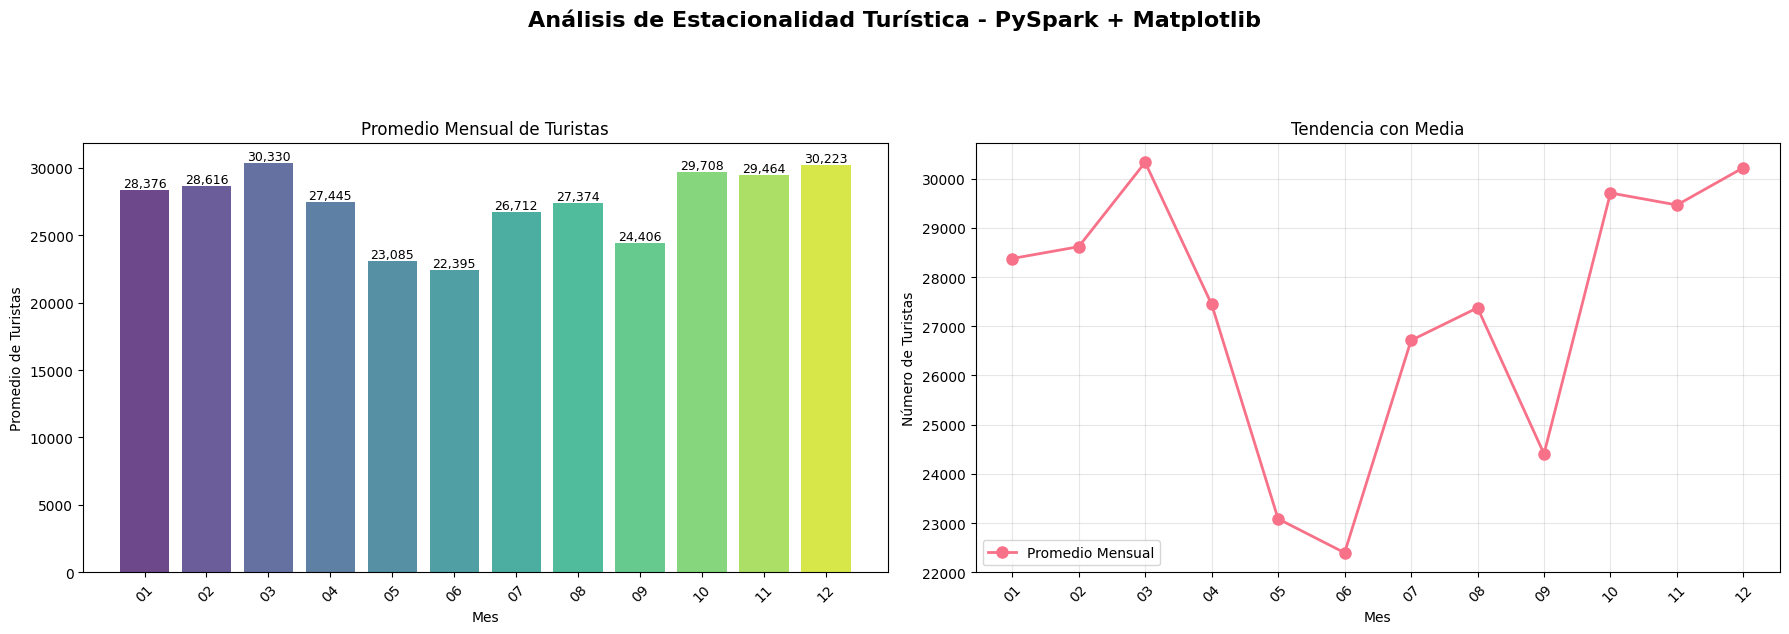

In [96]:
# Configurar estilo 
plt.style.use('default')
sns.set_palette("husl")


fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Análisis de Estacionalidad Turística - PySpark + Matplotlib', 
             fontsize=16, fontweight='bold', y=1.05)

# 1. Gráfico de barras - Promedio mensual
ax1 = axes[0]
bars = ax1.bar(estacionalidad_pd['mes'], 
               estacionalidad_pd['promedio_turistas'],
               color=sns.color_palette("viridis", len(estacionalidad_pd)),
               alpha=0.8)
ax1.set_title('Promedio Mensual de Turistas')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Promedio de Turistas')
ax1.tick_params(axis='x', rotation=45)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}', ha='center', va='bottom', fontsize=9)

# 2. Línea con media móvil
ax2 = axes[1]
ax2.plot(estacionalidad_pd['mes'], estacionalidad_pd['promedio_turistas'], 
         marker='o', linewidth=2, markersize=8, label='Promedio Mensual')
ax2.set_title('Tendencia con Media')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Número de Turistas')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


### Origen del turista

In [31]:
top_paises = df_sp.groupBy("LUGAR_RESIDENCIA#es") \
    .agg(sum("OBS_VALUE").alias("total_turistas")) \
    .orderBy(desc("total_turistas")) \
    .limit(10)

top_paises.show(10, truncate=False)

+------------------------------------------------------+--------------+
|LUGAR_RESIDENCIA#es                                   |total_turistas|
+------------------------------------------------------+--------------+
|Mundo (excluida España)                               |3.65209776E8  |
|Reino Unido                                           |1.29455115E8  |
|Alemania                                              |8.4188561E7   |
|España (excluida Canarias)                            |5.2357104E7   |
|Países Nórdicos                                       |4.2335285E7   |
|Otros países o territorios del mundo (excluida España)|3.7434054E7   |
|Francia                                               |1.6561004E7   |
|Países Bajos                                          |1.6299158E7   |
|Irlanda                                               |1.463937E7    |
|Italia                                                |1.3404208E7   |
+------------------------------------------------------+--------

In [32]:
principales_mercados = df_sp.filter(col("LUGAR_RESIDENCIA#es").isin(["Reino Unido", "Alemania", "España (excluida Canarias)", "Países Nórdicos", "Francia", "Países Bajos"])) \
    .groupBy("año", "LUGAR_RESIDENCIA#es") \
    .agg(sum("OBS_VALUE").alias("total_turistas")) \
    .orderBy("año", "LUGAR_RESIDENCIA#es")

print("\n * EVOLUCIÓN PRINCIPALES MERCADOS * ")
principales_mercados.show(truncate=False)


 * EVOLUCIÓN PRINCIPALES MERCADOS * 
+----+--------------------------+--------------+
|año |LUGAR_RESIDENCIA#es       |total_turistas|
+----+--------------------------+--------------+
|2010|Alemania                  |4516633.0     |
|2010|España (excluida Canarias)|3536486.0     |
|2010|Francia                   |417339.0      |
|2010|Países Bajos              |766840.0      |
|2010|Países Nórdicos           |2363375.0     |
|2010|Reino Unido               |6152833.0     |
|2011|Alemania                  |5092344.0     |
|2011|España (excluida Canarias)|3503268.0     |
|2011|Francia                   |602680.0      |
|2011|Países Bajos              |916685.0      |
|2011|Países Nórdicos           |2983043.0     |
|2011|Reino Unido               |7032317.0     |
|2012|Alemania                  |5331881.0     |
|2012|España (excluida Canarias)|3226340.0     |
|2012|Francia                   |635419.0      |
|2012|Países Bajos              |924325.0      |
|2012|Países Nórdicos          

In [63]:
principales_mercados_pd = principales_mercados.toPandas()


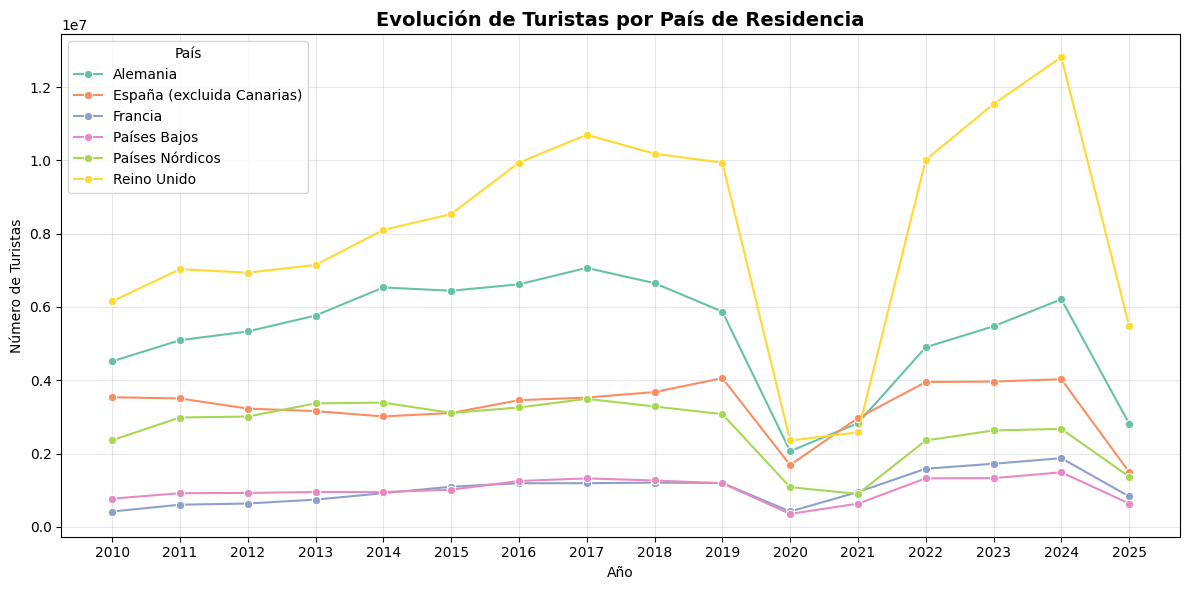

In [64]:
# Estilo
plt.style.use('default')
sns.set_palette("Set2")

# Crear figura
plt.figure(figsize=(12, 6))
sns.lineplot(data=principales_mercados_pd, 
             x="año", y="total_turistas", 
             hue="LUGAR_RESIDENCIA#es", 
             marker="o")

# Títulos y etiquetas
plt.title("Evolución de Turistas por País de Residencia", fontsize=14, fontweight='bold')
plt.xlabel("Año")
plt.ylabel("Número de Turistas")
plt.grid(True, alpha=0.3)
plt.legend(title="País")

plt.tight_layout()
plt.show()


### Analisis por islas

In [33]:
from pyspark.sql.window import Window

distribucion_islas = df_sp.groupBy("TERRITORIO#es") \
    .agg(sum("OBS_VALUE").alias("total_turistas")) \
    .withColumn("porcentaje", 
                round(col("total_turistas") * 100.0 / sum("total_turistas").over(Window.partitionBy()), 2)) \
    .orderBy(desc("total_turistas"))

distribucion_islas.show()

+-------------+--------------+----------+
|TERRITORIO#es|total_turistas|porcentaje|
+-------------+--------------+----------+
|     Tenerife|  2.98255183E8|      38.1|
| Gran Canaria|  2.08667187E8|     26.66|
|    Lanzarote|  1.45773629E8|     18.62|
|Fuerteventura|  1.15490551E8|     14.75|
|     La Palma|   1.4591027E7|      1.86|
+-------------+--------------+----------+



In [67]:
window_isla = Window.partitionBy("TERRITORIO#es").orderBy("año")

crecimiento_islas = df_sp.filter(col("año") >= 2018) \
    .groupBy("TERRITORIO#es", "año") \
    .agg(sum("OBS_VALUE").alias("turistas_año")) \
    .withColumn("turistas_año_anterior", lag("turistas_año").over(window_isla)) \
    .withColumn("crecimiento_porcentual", 
                round(((col("turistas_año") - col("turistas_año_anterior")) / col("turistas_año_anterior")) * 100, 2)) \
    .filter(col("crecimiento_porcentual").isNotNull()) \
    .orderBy("TERRITORIO#es", "año")

print("\n* CRECIMIENTO ANUAL POR ISLA (2019-2025) *")
crecimiento_islas.show(truncate=False)


* CRECIMIENTO ANUAL POR ISLA (2019-2025) *
+-------------+----+------------+---------------------+----------------------+
|TERRITORIO#es|año |turistas_año|turistas_año_anterior|crecimiento_porcentual|
+-------------+----+------------+---------------------+----------------------+
|Fuerteventura|2019|7761987.0   |8703832.0            |-10.82                |
|Fuerteventura|2020|2437865.0   |7761987.0            |-68.59                |
|Fuerteventura|2021|3803256.0   |2437865.0            |56.01                 |
|Fuerteventura|2022|8212629.0   |3803256.0            |115.94                |
|Fuerteventura|2023|9167385.0   |8212629.0            |11.63                 |
|Fuerteventura|2024|1.0274469E7 |9167385.0            |12.08                 |
|Fuerteventura|2025|4696607.0   |1.0274469E7          |-54.29                |
|Gran Canaria |2019|1.5786757E7 |1.6891362E7          |-6.54                 |
|Gran Canaria |2020|4843917.0   |1.5786757E7          |-69.32                |
|Gran Ca

In [68]:
crecimiento_islas_pd = crecimiento_islas.toPandas()


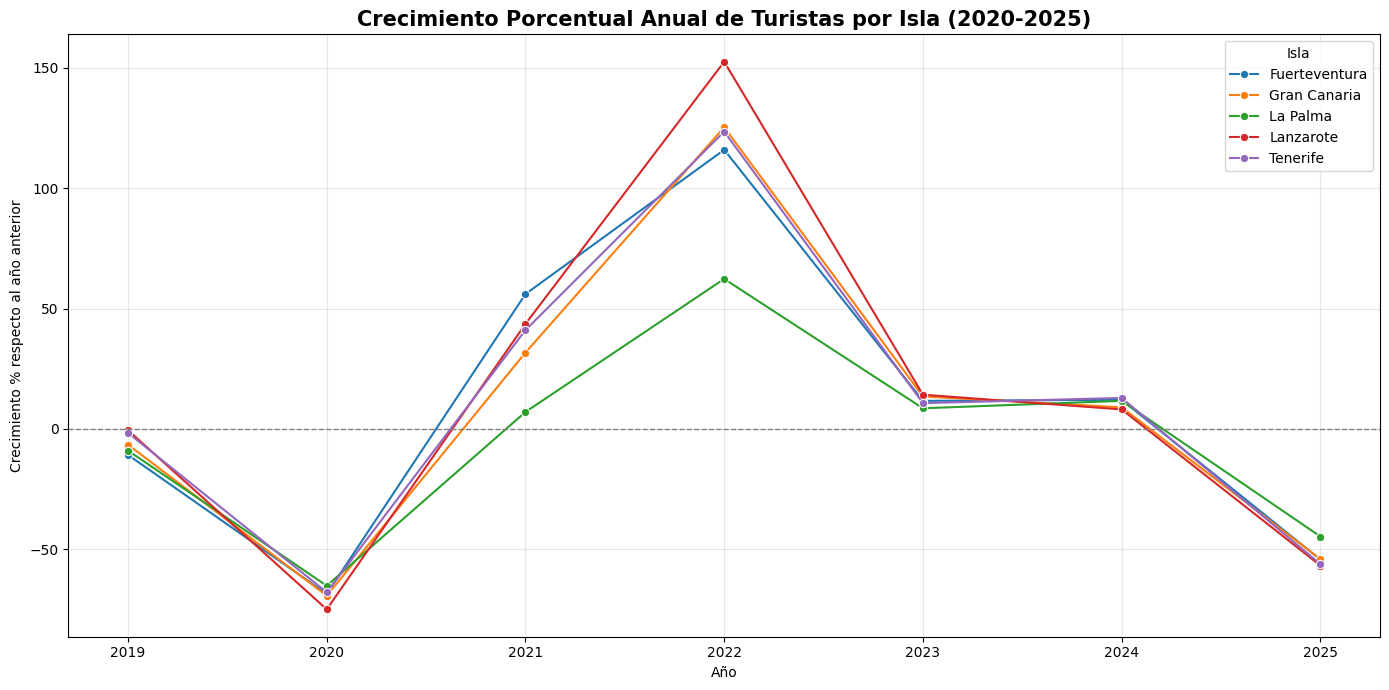

In [ ]:

# Estilo
plt.style.use('default')
sns.set_palette("tab10")

# Figura
plt.figure(figsize=(14, 7))
sns.lineplot(data=crecimiento_islas_pd, 
             x="año", y="crecimiento_porcentual", 
             hue="TERRITORIO#es", 
             marker="o")

# Títulos y etiquetas
plt.title("Crecimiento Porcentual Anual de Turistas por Isla (2019-2025)", 
          fontsize=15, fontweight='bold')
plt.xlabel("Año")
plt.ylabel("Crecimiento % respecto al año anterior")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title="Isla")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Tipo de alojamiento


In [35]:
alojamiento_preferencias = df_sp_type.groupBy("ALOJAMIENTO_TURISTICO_TIPO#es") \
    .agg(sum("OBS_VALUE").alias("total_turistas")) \
    .withColumn("porcentaje", 
                round(col("total_turistas") * 100.0 / sum("total_turistas").over(Window.partitionBy()), 2)) \
    .orderBy(desc("total_turistas"))

alojamiento_preferencias.show(truncate=False)

+-----------------------------------------------------+--------------+----------+
|ALOJAMIENTO_TURISTICO_TIPO#es                        |total_turistas|porcentaje|
+-----------------------------------------------------+--------------+----------+
|Hoteles y alojamientos similares                     |1.75220172E8  |45.63     |
|Hoteles y alojamientos similares excepto apartamentos|1.52313748E8  |39.66     |
|Apartamentos                                         |2.2906528E7   |5.97      |
|Vivienda de amigos y familiares                      |1.0777289E7   |2.81      |
|Cruceros                                             |8329976.0     |2.17      |
|Otro                                                 |8245370.0     |2.15      |
|Vivienda propia                                      |6210904.0     |1.62      |
+-----------------------------------------------------+--------------+----------+



In [36]:
alojamiento_por_pais = df_sp_type.groupBy("LUGAR_RESIDENCIA#es", "ALOJAMIENTO_TURISTICO_TIPO#es") \
    .agg(sum("OBS_VALUE").alias("turistas")) \
    .withColumn("total_pais", sum("turistas").over(Window.partitionBy("LUGAR_RESIDENCIA#es"))) \
    .withColumn("porcentaje", round(col("turistas") * 100.0 / col("total_pais"), 2)) \
    .filter(col("total_pais") > 100000) \
    .orderBy("LUGAR_RESIDENCIA#es", desc("porcentaje"))

print("\n * PREFERENCIAS DE ALOJAMIENTO POR PAÍS *")
alojamiento_por_pais.show(truncate=False)


 * PREFERENCIAS DE ALOJAMIENTO POR PAÍS *
+--------------------------+-----------------------------------------------------+------------+------------+----------+
|LUGAR_RESIDENCIA#es       |ALOJAMIENTO_TURISTICO_TIPO#es                        |turistas    |total_pais  |porcentaje|
+--------------------------+-----------------------------------------------------+------------+------------+----------+
|España (excluida Canarias)|Hoteles y alojamientos similares                     |2.0363245E7 |4.6541965E7 |43.75     |
|España (excluida Canarias)|Hoteles y alojamientos similares excepto apartamentos|1.8307918E7 |4.6541965E7 |39.34     |
|España (excluida Canarias)|Vivienda de amigos y familiares                      |4010119.0   |4.6541965E7 |8.62      |
|España (excluida Canarias)|Apartamentos                                         |2055369.0   |4.6541965E7 |4.42      |
|España (excluida Canarias)|Otro                                                 |1270651.0   |4.6541965E7 |2.73     

### Eventos especiales

In [37]:
ranking_eventos = df_sp_hotel.groupBy("EVENTO#es").agg(
    avg(when(col("MEDIDAS#es") == "Pernoctaciones", col("OBS_VALUE"))).alias("promedio_pernoctaciones"),
    avg(when(col("MEDIDAS#es") == "Viajeros entrados", col("OBS_VALUE"))).alias("promedio_viajeros_entrados"),
    avg(when(col("MEDIDAS#es") == "Viajeros alojados", col("OBS_VALUE"))).alias("promedio_viajeros_alojados")
).orderBy(desc("promedio_pernoctaciones"))

ranking_eventos.show(truncate=False)

+---------------------------------------------------------+-----------------------+--------------------------+--------------------------+
|EVENTO#es                                                |promedio_pernoctaciones|promedio_viajeros_entrados|promedio_viajeros_alojados|
+---------------------------------------------------------+-----------------------+--------------------------+--------------------------+
|Fiestas Lustrales de la Bajada de la Virgen de las Nieves|25780.33134920635      |3192.633266533066         |3982.3306613226455        |
|Ironman Lanzarote (quincena previa)                      |23072.118979151688     |3031.3113685734975        |3033.6585807385954        |
|Semana Santa larga                                       |18477.15444821289      |2810.2057742782154        |3332.015191199581         |
|Ironman Lanzarote (semana previa)                        |12618.344574780058     |1714.3904904530139        |1715.7731186821416        |
|Carnavales                       

In [38]:
evolucion_eventos = df_sp_hotel.groupBy("TIME_PERIOD#es", "EVENTO#es") \
    .agg(sum(when(col("MEDIDAS#es") == "Pernoctaciones", col("OBS_VALUE"))).alias("total_pernoctaciones")) \
    .orderBy("TIME_PERIOD#es", "EVENTO#es")

print("\n* EVOLUCIÓN DE EVENTOS ESPECIALES*")
evolucion_eventos.show(truncate=False)


* EVOLUCIÓN DE EVENTOS ESPECIALES*
+--------------+---------------------------------------------------------+--------------------+
|TIME_PERIOD#es|EVENTO#es                                                |total_pernoctaciones|
+--------------+---------------------------------------------------------+--------------------+
|2009          |Carnavales                                               |1838248.0           |
|2009          |Festival Womad Las Palmas de Gran Canaria                |1493625.0           |
|2009          |Gay Pride Maspalomas                                     |1938510.0           |
|2009          |Ironman Lanzarote (quincena previa)                      |4354433.0           |
|2009          |Ironman Lanzarote (semana previa)                        |2360624.0           |
|2009          |Puente de diciembre                                      |1682952.0           |
|2009          |Puente de todos los santos                               |1275513.0           |
|200

## Querys Avanzadas

### Covid-19

In [39]:
impacto_covid = df_sp.filter(col("año").isin([2019, 2020, 2021])) \
    .groupBy("año", "TERRITORIO#es") \
    .agg(sum("OBS_VALUE").alias("total_turistas")) \
    .withColumn("año_base", when(col("año") == 2019, col("total_turistas")).otherwise(None)) \
    .withColumn("año_base_filled", 
                last("año_base", ignorenulls=True).over(Window.partitionBy("TERRITORIO#es").orderBy("año"))) \
    .withColumn("variacion_covid", 
                round(((col("total_turistas") - col("año_base_filled")) / col("año_base_filled")) * 100, 2)) \
    .filter(col("año") != 2019) \
    .select("año", "TERRITORIO#es", "total_turistas", "variacion_covid") \
    .orderBy("TERRITORIO#es", "año")

print("\n * IMPACTO COVID-19 *")
impacto_covid.show(truncate=False)


 * IMPACTO COVID-19 *
+----+-------------+--------------+---------------+
|año |TERRITORIO#es|total_turistas|variacion_covid|
+----+-------------+--------------+---------------+
|2020|Fuerteventura|2437865.0     |-68.59         |
|2021|Fuerteventura|3803256.0     |-51.0          |
|2020|Gran Canaria |4843917.0     |-69.32         |
|2021|Gran Canaria |6377406.0     |-59.6          |
|2020|La Palma     |436237.0      |-65.19         |
|2021|La Palma     |466878.0      |-62.75         |
|2020|Lanzarote    |2913484.0     |-74.98         |
|2021|Lanzarote    |4183543.0     |-64.07         |
|2020|Tenerife     |7022266.0     |-67.9          |
|2021|Tenerife     |9903739.0     |-54.73         |
+----+-------------+--------------+---------------+



In [40]:
recuperacion_post_covid = df_sp.filter(col("año").isin([2019, 2022, 2023, 2024])) \
    .groupBy("año", "TERRITORIO#es") \
    .agg(sum("OBS_VALUE").alias("total_turistas")) \
    .withColumn("turistas_2019", 
                when(col("año") == 2019, col("total_turistas")).otherwise(None)) \
    .withColumn("turistas_2019_filled", 
                last("turistas_2019", ignorenulls=True).over(Window.partitionBy("TERRITORIO#es").orderBy("año"))) \
    .withColumn("porcentaje_recuperacion", 
                round((col("total_turistas") / col("turistas_2019_filled")) * 100, 2)) \
    .filter(col("año") != 2019) \
    .select("año", "TERRITORIO#es", "total_turistas", "porcentaje_recuperacion") \
    .orderBy("TERRITORIO#es", "año")

print("\n  *RECUPERACIÓN POST-COVID *")
recuperacion_post_covid.show()


  *RECUPERACIÓN POST-COVID *
+----+-------------+--------------+-----------------------+
| año|TERRITORIO#es|total_turistas|porcentaje_recuperacion|
+----+-------------+--------------+-----------------------+
|2022|Fuerteventura|     8212629.0|                 105.81|
|2023|Fuerteventura|     9167385.0|                 118.11|
|2024|Fuerteventura|   1.0274469E7|                 132.37|
|2022| Gran Canaria|   1.4369791E7|                  91.02|
|2023| Gran Canaria|   1.6304301E7|                 103.28|
|2024| Gran Canaria|   1.7764099E7|                 112.53|
|2022|     La Palma|      757738.0|                  60.46|
|2023|     La Palma|      822520.0|                  65.63|
|2024|     La Palma|      918298.0|                  73.28|
|2022|    Lanzarote|   1.0564541E7|                  90.74|
|2023|    Lanzarote|   1.2064467E7|                 103.62|
|2024|    Lanzarote|   1.3039869E7|                  112.0|
|2022|     Tenerife|   2.2135427E7|                 101.19|
|2023|    

In [82]:
evolucion_completa = df_sp.filter(col("año").isin([2019, 2020, 2021, 2022, 2023, 2024])) \
    .groupBy("año", "TERRITORIO#es") \
    .agg(sum("OBS_VALUE").alias("total_turistas")) \
    .orderBy("TERRITORIO#es", "año")

evolucion_pd = evolucion_completa.toPandas()
evolucion_pd.head()

,año,TERRITORIO#es,total_turistas
0,2019,Fuerteventura,7761987.0
1,2020,Fuerteventura,2437865.0
2,2021,Fuerteventura,3803256.0
3,2022,Fuerteventura,8212629.0
4,2023,Fuerteventura,9167385.0


In [76]:
impacto_pd = impacto_covid.toPandas()
recuperacion_pd = recuperacion_post_covid.toPandas()


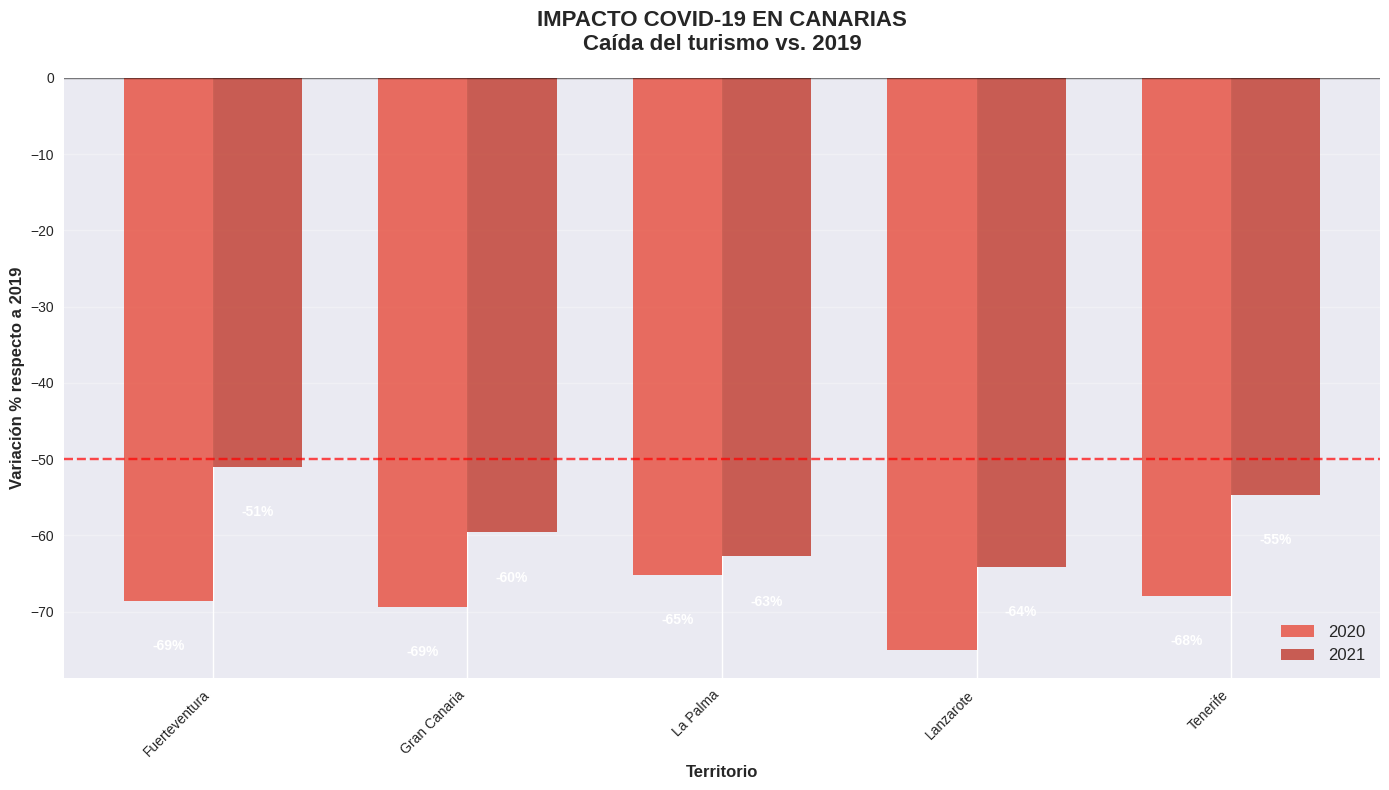


=== GRÁFICO 2: RECUPERACIÓN POST-COVID ===


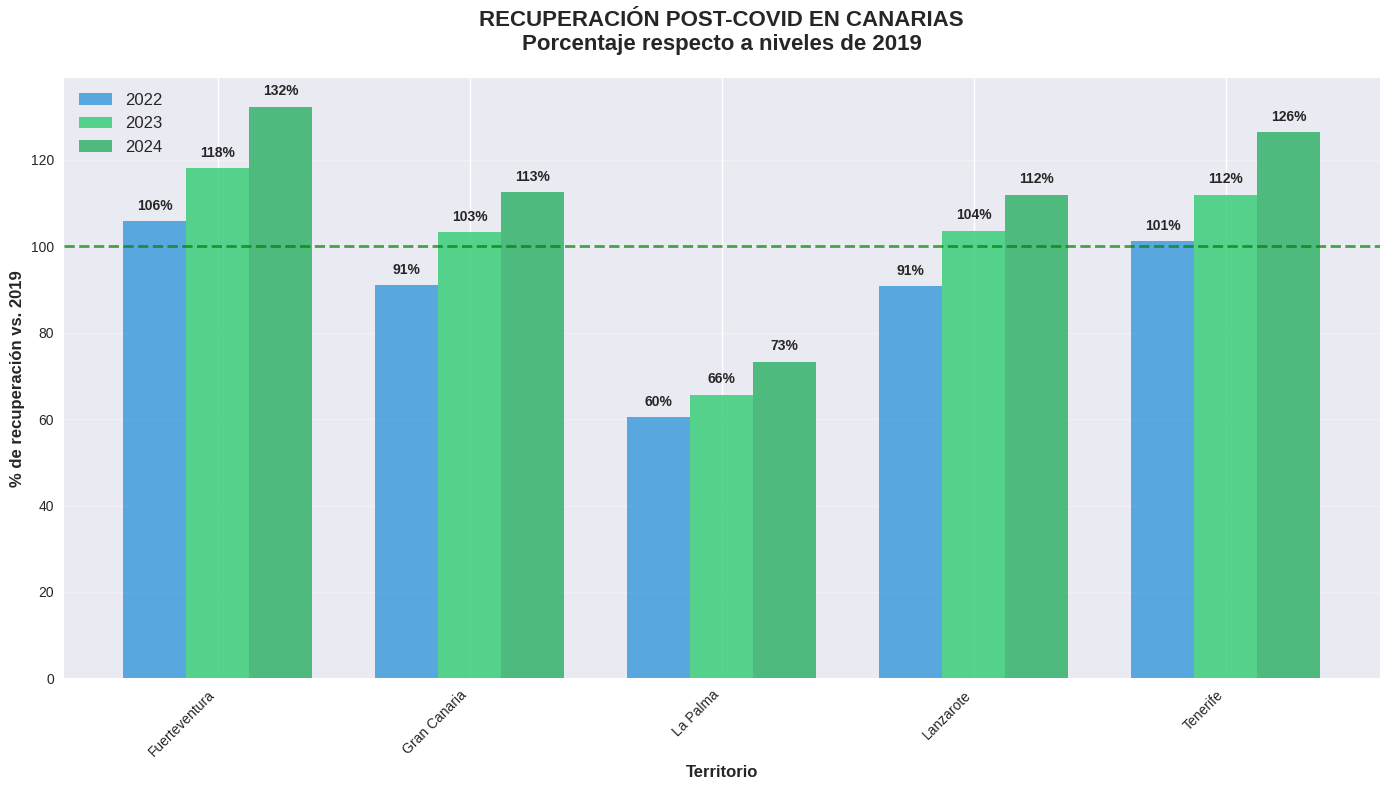

In [97]:
# estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")


fig, ax = plt.subplots(figsize=(14, 8))

# Pivot para facilitar el plotting
impacto_pivot = impacto_pd.pivot(index='TERRITORIO#es', columns='año', values='variacion_covid')

# barras agrupadas
x = np.arange(len(impacto_pivot.index))
width = 0.35

bars1 = ax.bar(x - width/2, impacto_pivot['2020'], width, 
               label='2020', color='#E74C3C', alpha=0.8)
bars2 = ax.bar(x + width/2, impacto_pivot['2021'], width, 
               label='2021', color='#C0392B', alpha=0.8)

#  valores 
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height - 5,
            f'{height:.0f}%', ha='center', va='top', fontweight='bold', color='white')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height - 5,
            f'{height:.0f}%', ha='center', va='top', fontweight='bold', color='white')

# Personalizar gráfico
ax.set_title('IMPACTO COVID-19 EN CANARIAS\nCaída del turismo vs. 2019', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Territorio', fontsize=12, fontweight='bold')
ax.set_ylabel('Variación % respecto a 2019', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(impacto_pivot.index, rotation=45, ha='right')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)

#  linea de referencia
ax.axhline(y=-50, color='red', linestyle='--', alpha=0.7, label='Caída severa (-50%)')

plt.tight_layout()
plt.show()


print("\n=== GRÁFICO 2: RECUPERACIÓN POST-COVID ===")

# Crear gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Pivot 
recuperacion_pivot = recuperacion_pd.pivot(index='TERRITORIO#es', columns='año', values='porcentaje_recuperacion')

# barras agrupadas
x = np.arange(len(recuperacion_pivot.index))
width = 0.25

bars1 = ax.bar(x - width, recuperacion_pivot['2022'], width, 
               label='2022', color='#3498DB', alpha=0.8)
bars2 = ax.bar(x, recuperacion_pivot['2023'], width, 
               label='2023', color='#2ECC71', alpha=0.8)
bars3 = ax.bar(x + width, recuperacion_pivot['2024'], width, 
               label='2024', color='#27AE60', alpha=0.8)

# valores 
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.0f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Personalizar gráfico
ax.set_title('RECUPERACIÓN POST-COVID EN CANARIAS\nPorcentaje respecto a niveles de 2019', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Territorio', fontsize=12, fontweight='bold')
ax.set_ylabel('% de recuperación vs. 2019', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(recuperacion_pivot.index, rotation=45, ha='right')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

# Línea de referencia en 100%
ax.axhline(y=100, color='green', linestyle='--', alpha=0.7, linewidth=2, label='Nivel pre-COVID (100%)')

plt.tight_layout()
plt.show()


### Correlaciones

In [41]:
df_eventos_pivot = df_sp_hotel.groupBy("TIME_PERIOD#es", "EVENTO#es", "isla#es") \
    .pivot("MEDIDAS#es") \
    .sum("OBS_VALUE") \
    .withColumnRenamed("Pernoctaciones", "pernoctaciones") \
    .withColumnRenamed("Viajeros entrados", "viajeros_entrados") \
    .withColumnRenamed("Viajeros alojados", "viajeros_alojados")

print("\n=== VISTA PREVIA DE DATOS PIVOTEADOS ===")
df_eventos_pivot.show(5)


=== VISTA PREVIA DE DATOS PIVOTEADOS ===


+--------------+--------------------+-------------+--------------+-----------------+-----------------+
|TIME_PERIOD#es|           EVENTO#es|      isla#es|pernoctaciones|viajeros_alojados|viajeros_entrados|
+--------------+--------------------+-------------+--------------+-----------------+-----------------+
|          2010|Gay Pride Maspalomas| Gran Canaria|      505762.0|          72444.0|          72534.0|
|          2014|Ironman Lanzarote...| Gran Canaria|      667588.0|          85068.0|          85084.0|
|          2011| Puente de diciembre|Fuerteventura|      517063.0|          54187.0|          54158.0|
|          2009| Puente de diciembre|    Lanzarote|      208074.0|          25796.0|          25742.0|
|          2015|Ironman Lanzarote...|    La Gomera|       18894.0|           2989.0|           2989.0|
+--------------+--------------------+-------------+--------------+-----------------+-----------------+
only showing top 5 rows


In [42]:
correlacion_eventos = df_eventos_pivot.select(
    corr("pernoctaciones", "viajeros_entrados").alias("corr_pernoc_viajeros"),
    corr("pernoctaciones", "viajeros_alojados").alias("corr_pernoc_alojados"),
    corr("viajeros_entrados", "viajeros_alojados").alias("corr_viajeros")
)

print("\n* CORRELACIONES EN EVENTOS ESPECIALES*")
correlacion_eventos.show()


* CORRELACIONES EN EVENTOS ESPECIALES*


+--------------------+--------------------+------------------+
|corr_pernoc_viajeros|corr_pernoc_alojados|     corr_viajeros|
+--------------------+--------------------+------------------+
|  0.9898421305118814|  0.8814272249797452|0.9121542316503893|
+--------------------+--------------------+------------------+



In [43]:
correlaciones_por_isla = df_eventos_pivot.groupBy("isla#es") \
    .agg(
        corr("pernoctaciones", "viajeros_entrados").alias("corr_pernoc_viajeros"),
        corr("pernoctaciones", "viajeros_alojados").alias("corr_pernoc_alojados"),
        corr("viajeros_entrados", "viajeros_alojados").alias("corr_viajeros")
    ) \
    .orderBy("isla#es")

print("\n *CORRELACIONES POR ISLA *")
correlaciones_por_isla.show()


 *CORRELACIONES POR ISLA *


+-------------+--------------------+--------------------+------------------+
|      isla#es|corr_pernoc_viajeros|corr_pernoc_alojados|     corr_viajeros|
+-------------+--------------------+--------------------+------------------+
|Fuerteventura|  0.9772948769101221|   0.709389393818151|0.7639268099680243|
| Gran Canaria|   0.974032919064806|  0.6719500619328632|0.7502365572459507|
|    La Gomera|  0.9733115105030103|  0.7587063681981132| 0.824452192009234|
|     La Palma|  0.9647066209500934|  0.8251134760041097|0.8623016357945591|
|    Lanzarote|  0.9830156266999583|  0.7548374571264381|0.8058647578369426|
|     Tenerife|  0.9718998745782218|   0.674944797690338| 0.763914410948703|
+-------------+--------------------+--------------------+------------------+



In [44]:
correlaciones_por_evento = df_eventos_pivot.groupBy("EVENTO#es") \
    .agg(
        corr("pernoctaciones", "viajeros_entrados").alias("corr_pernoc_viajeros"),
        corr("pernoctaciones", "viajeros_alojados").alias("corr_pernoc_alojados"),
        corr("viajeros_entrados", "viajeros_alojados").alias("corr_viajeros"),
        count("*").alias("num_observaciones")
    ) \
    .filter(col("num_observaciones") >= 30) \
    .orderBy("EVENTO#es")

print("\n* CORRELACIONES POR EVENTO *")
correlaciones_por_evento.show(truncate=False)


* CORRELACIONES POR EVENTO *


+-----------------------------------+--------------------+--------------------+------------------+-----------------+
|EVENTO#es                          |corr_pernoc_viajeros|corr_pernoc_alojados|corr_viajeros     |num_observaciones|
+-----------------------------------+--------------------+--------------------+------------------+-----------------+
|Carnavales                         |0.992008056690075   |0.8767181488531912  |0.8767127654266313|96               |
|Festival Mueca                     |0.9955011731422843  |0.9955494676633546  |0.9999929914942943|30               |
|Ironman Lanzarote (quincena previa)|0.9972773266332233  |0.997281641151898   |0.999997871347628 |66               |
|Ironman Lanzarote (semana previa)  |0.996136244202251   |0.9961612126679534  |0.9999969737768151|66               |
|Puente de diciembre                |0.9873141720423178  |0.9872367732450634  |0.9999959955753402|84               |
|Puente de todos los santos         |0.9936476104817318  |0.9930

In [45]:

correlaciones_anuales = df_eventos_pivot.groupBy("TIME_PERIOD#es") \
    .agg(
        corr("pernoctaciones", "viajeros_entrados").alias("corr_pernoc_viajeros"),
        corr("pernoctaciones", "viajeros_alojados").alias("corr_pernoc_alojados"),
        corr("viajeros_entrados", "viajeros_alojados").alias("corr_viajeros")
    ) \
    .orderBy("TIME_PERIOD#es")

print("\n  *EVOLUCIÓN DE CORRELACIONES POR AÑO*")
correlaciones_anuales.show(truncate=False)


  *EVOLUCIÓN DE CORRELACIONES POR AÑO*
+--------------+--------------------+--------------------+------------------+
|TIME_PERIOD#es|corr_pernoc_viajeros|corr_pernoc_alojados|corr_viajeros     |
+--------------+--------------------+--------------------+------------------+
|2009          |0.9883458211141669  |0.9265267458102485  |0.9559789422700361|
|2010          |0.9819321456591075  |0.8619402841338583  |0.9233573145368172|
|2011          |0.9912552865099736  |0.9147279062781972  |0.9380840554454928|
|2012          |0.9922670551449886  |0.8870634930505685  |0.9257025949182792|
|2013          |0.9920500883915124  |0.888898464048612   |0.9145403624715646|
|2014          |0.9953433321274034  |0.907287430392979   |0.9226342677702947|
|2015          |0.9901495983579002  |0.9059807019881492  |0.934703386431844 |
|2016          |0.9944387939633202  |0.9044728914498629  |0.9242570369863398|
|2017          |0.9957619424973873  |0.9047209998838334  |0.9174600677371612|
|2018          |0.994209

## INSIGHTS Especificos

In [46]:
mejor_mes_isla = df_sp.groupBy("TERRITORIO#es", "mes") \
    .agg(avg("OBS_VALUE").alias("promedio_turistas")) \
    .withColumn("rank", 
                row_number().over(Window.partitionBy("TERRITORIO#es").orderBy(desc("promedio_turistas")))) \
    .filter(col("rank") == 1) \
    .select("TERRITORIO#es", "mes", "promedio_turistas") \
    .orderBy("TERRITORIO#es")

print("\n=== MEJOR MES PARA CADA ISLA ===")
mejor_mes_isla.show(truncate=False)


=== MEJOR MES PARA CADA ISLA ===
+-------------+---+------------------+
|TERRITORIO#es|mes|promedio_turistas |
+-------------+---+------------------+
|Fuerteventura|10 |22444.049783549784|
|Gran Canaria |12 |43789.40041493776 |
|La Palma     |12 |3791.7158836689036|
|Lanzarote    |03 |27201.68604651163 |
|Tenerife     |03 |56606.294003868476|
+-------------+---+------------------+



In [47]:
crecimiento_paises = df_sp.filter(col("año").isin([2021, 2024])) \
    .groupBy("LUGAR_RESIDENCIA#es", "año") \
    .agg(sum("OBS_VALUE").alias("total_turistas")) \
    .groupBy("LUGAR_RESIDENCIA#es") \
    .pivot("año") \
    .sum("total_turistas") \
    .withColumn("crecimiento_porcentual", 
                round(((col("2024") - col("2021")) / col("2021")) * 100, 2)) \
    .filter(col("2021") > 10000) \
    .orderBy(desc("crecimiento_porcentual")) \
    .limit(10)

print("\n=== PAÍSES CON MAYOR CRECIMIENTO (2021-2024) ===")
crecimiento_paises.show(truncate=False)


=== PAÍSES CON MAYOR CRECIMIENTO (2021-2024) ===
+------------------------------------------------------+-----------+-----------+----------------------+
|LUGAR_RESIDENCIA#es                                   |2021       |2024       |crecimiento_porcentual|
+------------------------------------------------------+-----------+-----------+----------------------+
|Reino Unido                                           |2579420.0  |1.2818956E7|396.97                |
|Irlanda                                               |359198.0   |1619332.0  |350.82                |
|Mundo (excluida España)                               |1.0882266E7|3.2810276E7|201.5                 |
|Países Nórdicos                                       |897916.0   |2672199.0  |197.6                 |
|Italia                                                |591462.0   |1577626.0  |166.73                |
|Países Bajos                                          |631692.0   |1486817.0  |135.37                |
|Otros países 